# Student Mental Health & Academic Pressure (2025)

This notebook analyzes student mental health data from a Kaggle dataset.
The goal is to explore academic pressure, mental health indicators, and
their relationships using Pandas and NumPy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Student_Mental_Health_Academic_Pressure_2025.csv - Form Responses 1.csv")



In [ ]:
df.head()


,Timestamp,Age Group,Gender\n,Current Education Level,How much academic pressure do you feel?,How often do you feel stressed due to studies?,How many hours do you sleep on average per night?,What is the main cause of your academic stress?
0,12/13/2025 6:18:33,15–18,Female,College,4,Sometimes,7–8,1 .Exam and grades pressure
1,12/13/2025 6:24:50,15–18,Male,College,4,Often,5–6,Exams and Grades Pressure
2,12/13/2025 6:29:50,15–18,Female,University,3,Sometimes,7–8,financial conditions
3,12/13/2025 7:36:26,27+,Male,Other,1,Always,7–8,Other
4,12/13/2025 8:01:20,15–18,Female,College,2,Sometimes,5–6,Prefer not to say


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Timestamp                                              33 non-null     object
 1   Age Group                                              33 non-null     object
 2     Gender
                                              33 non-null     object
 3     Current Education Level                              33 non-null     object
 4     How much academic pressure do you feel?              33 non-null     int64 
 5    How often do you feel stressed due to studies?        33 non-null     object
 6     How many hours do you sleep on average per night?    33 non-null     object
 7     What is the main cause of your academic stress?      33 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.2+ KB


In [ ]:
df = df.dropna()


In [ ]:
df.columns = df.columns.str.strip()
pressure_counts = df['How much academic pressure do you feel?'].value_counts()
pressure_counts


How much academic pressure do you feel?
4    15
5     9
3     6
2     2
1     1
Name: count, dtype: int64

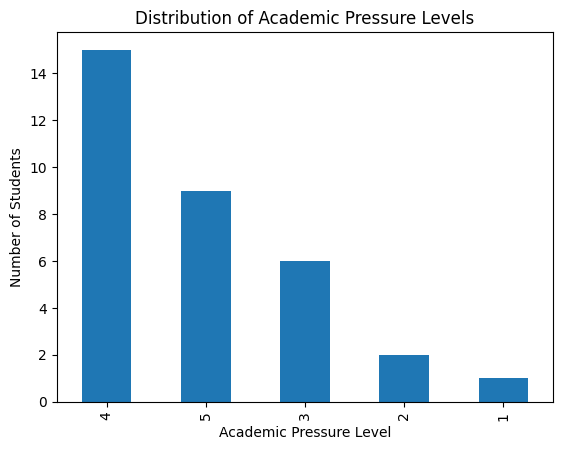

In [ ]:
pressure_counts.plot(kind='bar')
plt.title("Distribution of Academic Pressure Levels")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")
plt.show()


### Analysis 1: Academic Pressure Distribution

Most students report moderate to high academic pressure,
indicating that academic workload is a significant factor
in student life.


In [ ]:
stress_freq = df['How often do you feel stressed due to studies?'].value_counts()
stress_freq



How often do you feel stressed due to studies?
Sometimes    21
Always        7
Often         5
Name: count, dtype: int64

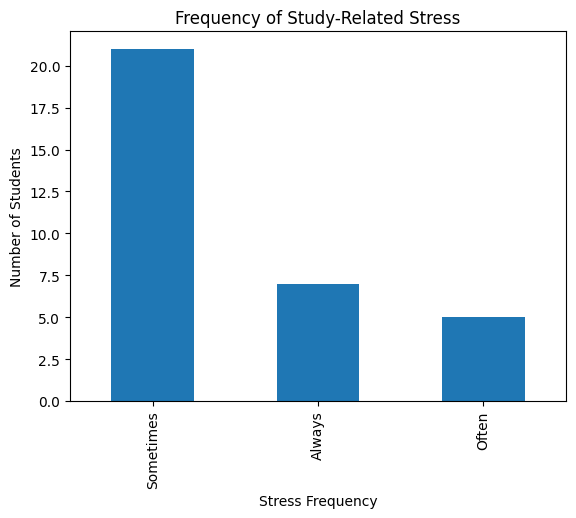

In [ ]:
stress_freq.plot(kind='bar')
plt.title("Frequency of Study-Related Stress")
plt.xlabel("Stress Frequency")
plt.ylabel("Number of Students")
plt.show()


### Analysis 2: Study-Related Stress Frequency

A large proportion of students report feeling stressed
sometimes or often due to their studies.


In [ ]:
pressure_vs_stress = df.groupby(
    'How much academic pressure do you feel?'
)['How often do you feel stressed due to studies?'].value_counts()

pressure_vs_stress


How much academic pressure do you feel?  How often do you feel stressed due to studies?
1                                        Always                                             1
2                                        Often                                              1
                                         Sometimes                                          1
3                                        Sometimes                                          5
                                         Always                                             1
4                                        Sometimes                                         10
                                         Always                                             3
                                         Often                                              2
5                                        Sometimes                                          5
                                         Always                   

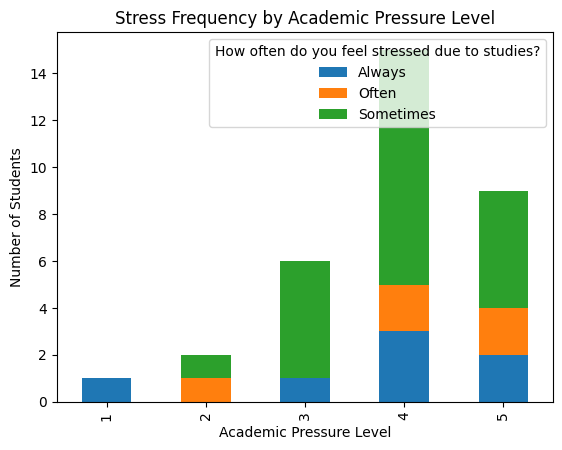

In [ ]:
pressure_stress_table = pd.crosstab(
    df['How much academic pressure do you feel?'],
    df['How often do you feel stressed due to studies?']
)

pressure_stress_table.plot(kind='bar', stacked=True)
plt.title("Stress Frequency by Academic Pressure Level")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")
plt.show()


### Analysis 3: Academic Pressure and Stress

Higher academic pressure levels are associated with more
frequent reports of study-related stress, indicating
a clear relationship between workload and stress.


In [ ]:
sleep_by_pressure = df.groupby(
    'How much academic pressure do you feel?'
)['How many hours do you sleep on average per night?'].value_counts()

sleep_by_pressure


How much academic pressure do you feel?  How many hours do you sleep on average per night?
1                                        7–8                                                   1
2                                        5–6                                                   1
                                         7–8                                                   1
3                                        7–8                                                   5
                                         More than 8                                           1
4                                        7–8                                                  10
                                         5–6                                                   3
                                         More than 8                                           2
5                                        7–8                                                   7
                                    

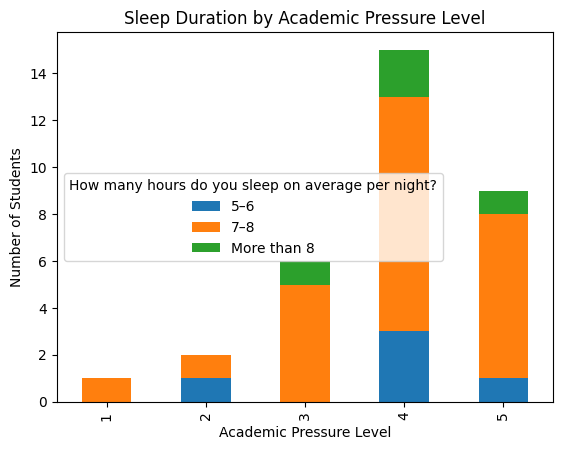

In [ ]:
sleep_table = pd.crosstab(
    df['How much academic pressure do you feel?'],
    df['How many hours do you sleep on average per night?']
)

sleep_table.plot(kind='bar', stacked=True)
plt.title("Sleep Duration by Academic Pressure Level")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")
plt.show()


### Analysis 4: Sleep and Academic Pressure

Students experiencing higher academic pressure tend to
report shorter sleep durations, suggesting that stress
may negatively affect sleep habits.


## Conclusion

This analysis shows that academic pressure is widespread
among students and is closely related to increased stress
and reduced sleep duration. These findings highlight the
importance of managing academic workload to support
student well-being.
